<a href="https://colab.research.google.com/github/derek881107/-Love-Frequency-Chart-The-Heartbeat-of-Long-Distance-and-Cross-Border-/blob/main/%F0%9F%93%8C_%22Love_Frequency_Chart_The_Heartbeat_of_Long_Distance_and_Cross_Border%22_%F0%9F%92%96%F0%9F%93%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 "Love Frequency Chart: The Heartbeat of Long-Distance and Cross-Border Romance" 💖📊

This program analyzes LINE chat history to track the frequency of affectionate words over time. By extracting and visualizing chat data, it identifies communication patterns, seasonal trends, and the impact of long-distance relationships.

Key features include:

✅ Word Cloud Generation – Highlights commonly used words in conversations.

✅ Love Word Frequency Analysis – Tracks affectionate expressions over time.

✅ Trend Visualization – Uses a color-coded bar chart to show peaks and dips in love word usage.

This tool helps reveal how relationship dynamics evolve, especially during long-distance phases and major life transitions like studying abroad! 🌍💬💕

This Python script processes LINE chat logs to analyze the frequency of affectionate words, generate a word cloud, and create a trend chart for sentiment analysis over time.

**🔹 Features and Implementation**

**1️⃣ Extract Chat Messages**

Reads the .txt LINE chat log file.

Removes timestamps and sender names (e.g., "Derek") while keeping the rest of the text.

Ignores bracketed content (e.g., "(moon laugh)", "(big smile)") but preserves the remaining sentence.

Filters out predefined meaningless phrases, such as:

"Photo Photo", "Call Time", "Sticker Sticker", "Canceled Call", "Phone Call", etc.

**2️⃣ Generate Word Cloud**

Uses Jieba for precise Chinese word segmentation.
Adds a custom dictionary to prevent incorrect splitting (e.g., "早安寶貝" correctly separates into "早安" and "寶貝").

Generates a word cloud of frequently used words.

**3️⃣ Word Frequency Analysis**

Counts the total occurrences of each word in the conversation.

Filters out single-character words and ignored phrases.
Outputs a sorted word frequency table.

**4️⃣ Monthly Trend Analysis for Affectionate Words**

Tracks the monthly usage of affectionate words, such as "想你", "愛", "親親", "抱抱", "晚安", "好想你", etc.

Color-coded bar chart for frequency representation:

🔴 High frequency → Red

⚪ Low frequency → White

Adjusts the X-axis format for better readability:

Displays "YYYY-01" for January (e.g., "2024-01").

Only shows the month for other months (e.g., "02", "03", "04").

**5️⃣ Improved Chart Layout**

Expands figure width to avoid overcrowding.

Optimizes X-axis label spacing.


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


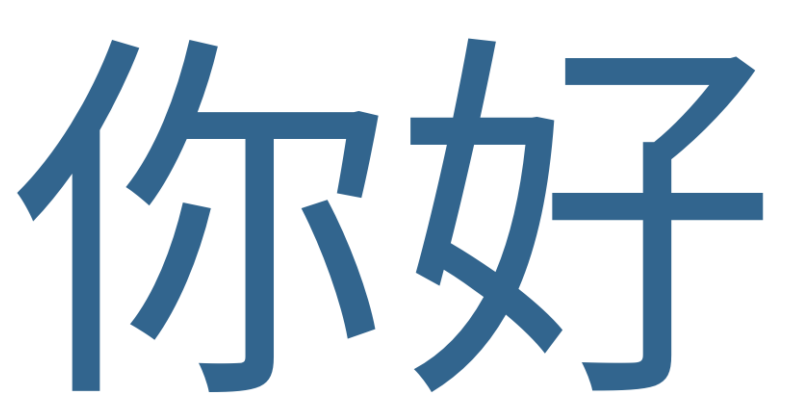

In [28]:
# 下載並安裝思源黑體 (Noto Sans CJK) 作為中文字體
!apt-get update -qq
!apt-get install -qq fonts-noto-cjk

# 找到字體安裝路徑
import matplotlib.font_manager as fm

# 設置字體路徑
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

# 確保 WordCloud 使用正確的中文字體
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate("你好 你好 你好")

# 測試顯示文字雲
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [20]:
# Install required packages
!pip install wordcloud jieba matplotlib pandas numpy

import re
import jieba
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import defaultdict
from datetime import datetime

In [29]:
# Add custom dictionary to improve segmentation accuracy
custom_words = ["早安", "寶貝", "晚安", "好想你", "親親", "抱抱", "心疼", "甜甜", "在一起", "愛你"]
for word in custom_words:
    jieba.add_word(word)

# 1️⃣ Extract Chat Messages
file_path = "/content/sample_data/[LINE] Chat with mylove.txt"  # Modify this to match your file

def extract_chat_messages(file_path):
    """
    Parses LINE chat logs:
    - Removes "Derek" while keeping the rest of the message.
    - Removes content inside brackets (e.g., "(moon laugh)").
    - Filters out predefined meaningless phrases (e.g., "Photo Photo", "Call Time", "Sticker").
    - Counts the frequency of all words in the conversation.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    messages = []
    word_count = defaultdict(int)  # Tracks word frequency
    love_words_count = defaultdict(int)  # Tracks affectionate word frequency
    love_words = {"想你", "愛", "寶貝", "抱抱", "親親", "在一起", "心疼", "喜歡",
                  "晚安", "吻", "抱歉", "好想你"}
    ignored_phrases = {"Photo Photo", "Call Time", "Photo", "time Call", "Call time", "Sticker Sticker", "Sticker",
                       "time Photo", "Phone Call", "Canceled call", "time Call","Missed call", "call Missed"
                        }  # Excluded words
    current_date = None
    total_ignored = 0  # Counter for ignored messages
    total_processed = 0  # Counter for processed messages

    for line in lines:
        # Extract date (e.g., "Thu, 11/08/2018")
        date_match = re.match(r"(\w{3}),\s(\d{2}/\d{2}/\d{4})", line)
        if date_match:
            date_str = date_match.group(2)  # MM/DD/YYYY
            current_date = datetime.strptime(date_str, "%m/%d/%Y")  # Convert to datetime object
            continue  # Skip the date line

        # Extract message content
        msg_match = re.match(r"\d{2}:\d{2}[APM]+\s+\S+\s+(.+)", line)
        if msg_match and current_date:
            message = msg_match.group(1)  # Only keep message content

            # Remove bracketed content but keep the rest of the sentence
            message = re.sub(r"\(.*?\)", "", message).strip()

            # Remove "Derek" while keeping the rest of the sentence
            message = re.sub(r"\bDerek\b", "", message).strip()

            # Skip messages that only contain predefined ignored phrases
            if any(phrase in message for phrase in ignored_phrases):
                total_ignored += 1
                continue

            # Skip empty messages
            if message:
                messages.append(message)
                total_processed += 1

                # Count word frequency
                for word in jieba.cut(message):
                    if len(word) > 1 and word not in ignored_phrases:
                        word_count[word] += 1

                # Count affectionate words per month
                month = current_date.strftime("%Y-%m")
                for word in love_words:
                    if word in message:
                        love_words_count[month] += 1

    return " ".join(messages), word_count, love_words_count, total_processed, total_ignored


🔹 **Processing Summary**
📌 Total messages processed: 148276
📌 Total messages ignored: 9681
📌 Unique words counted: 35578
📌 Months analyzed: 76

🔹 **Generating Word Cloud**


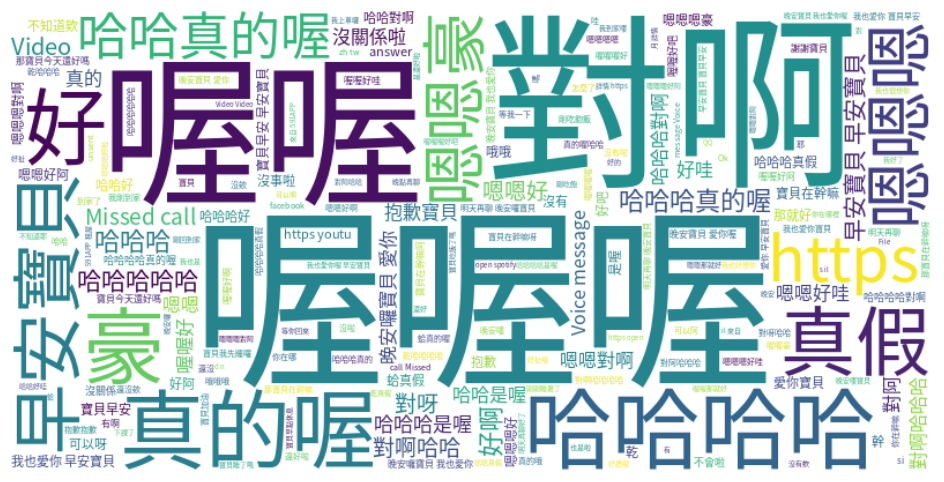

In [23]:
# Extract chat messages and count word frequencies
chat_text, word_count, monthly_love_words, total_processed, total_ignored = extract_chat_messages(file_path)

# Print Summary Counts
print("\n🔹 **Processing Summary**")
print(f"📌 Total messages processed: {total_processed}")
print(f"📌 Total messages ignored: {total_ignored}")
print(f"📌 Unique words counted: {len(word_count)}")
print(f"📌 Months analyzed: {len(monthly_love_words)}")

# 2️⃣ Generate Word Cloud
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

if chat_text:
    print("\n🔹 **Generating Word Cloud**")
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate(chat_text)

    # Display Word Cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("⚠️ Unable to generate word cloud. Please check input data.")

In [ ]:
# Install required packages
!pip install wordcloud jieba matplotlib pandas numpy googletrans==4.0.0-rc1

import re
import jieba
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import defaultdict
from datetime import datetime
from googletrans import Translator  # Google Translate API for auto translation

# Add custom dictionary to improve segmentation accuracy
custom_words = ["早安", "寶貝", "晚安", "好想你", "親親", "抱抱", "心疼", "甜甜", "在一起", "愛你"]
for word in custom_words:
    jieba.add_word(word)

# Initialize Google Translator
translator = Translator()

# Function to translate Chinese words into English
def translate_to_english(words):
    translations = {}
    for word in words:
        try:
            translated_word = translator.translate(word, src="zh-CN", dest="en").text
            translations[word] = translated_word
        except:
            translations[word] = word  # If translation fails, keep the original
    return translations

# Extract Chat Messages
file_path = "/content/sample_data/[LINE] Chat with mylove.txt"

def extract_chat_messages(file_path):
    """
    Parses LINE chat logs:
    - Removes "Derek" while keeping the rest of the message.
    - Removes content inside brackets (e.g., "(moon laugh)").
    - Filters out predefined meaningless phrases.
    - Counts the frequency of all words in the conversation.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    messages = []
    word_count = defaultdict(int)  # Tracks word frequency
    current_date = None

    for line in lines:
        # Extract date (e.g., "Thu, 11/08/2018")
        date_match = re.match(r"(\w{3}),\s(\d{2}/\d{2}/\d{4})", line)
        if date_match:
            date_str = date_match.group(2)  # MM/DD/YYYY
            current_date = datetime.strptime(date_str, "%m/%d/%Y")  # Convert to datetime object
            continue  # Skip the date line

        # Extract message content
        msg_match = re.match(r"\d{2}:\d{2}[APM]+\s+\S+\s+(.+)", line)
        if msg_match and current_date:
            message = msg_match.group(1)  # Only keep message content

            # Remove bracketed content but keep the rest of the sentence
            message = re.sub(r"\(.*?\)", "", message).strip()

            # Remove "Derek" while keeping the rest of the sentence
            message = re.sub(r"\bDerek\b", "", message).strip()

            # Skip empty messages
            if message:
                messages.append(message)

                # Count word frequency
                for word in jieba.cut(message):
                    if len(word) > 1:
                        word_count[word] += 1

    return " ".join(messages), word_count

# Extract chat messages and count word frequencies
chat_text, word_count = extract_chat_messages(file_path)

# Translate words to English
word_translations = translate_to_english(word_count.keys())

# Replace Chinese words with English translations
translated_word_count = {word_translations[word]: freq for word, freq in word_count.items()}

# 2️⃣ Generate English Word Cloud
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

if chat_text:
    print("\n🔹 **Generating English Word Cloud**")
    english_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate_from_frequencies(translated_word_count)

    # Display English Word Cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(english_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("English Word Cloud from Chat Data")
    plt.show()
else:
    print("⚠️ Unable to generate word cloud. Please check input data.")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=5f53061fa928a762ed89e188d407af46e36e4270d576e78077543572c950870f
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram


🔹 **Word Frequency Analysis (Top 10 Words)**
  Word  Frequency
0   寶貝      10282
1   哈哈       9488
2   真的       7174
3   今天       6758
4  哈哈哈       6585
5   可以       4753
6   現在       4282
7   剛剛       3496
8   應該       3396
9   明天       2983

🔹 **Generating Love Word Frequency Chart**


<ipython-input-25-7c2692637021>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(format_month_labels(love_words_df["Month"]), rotation=45)


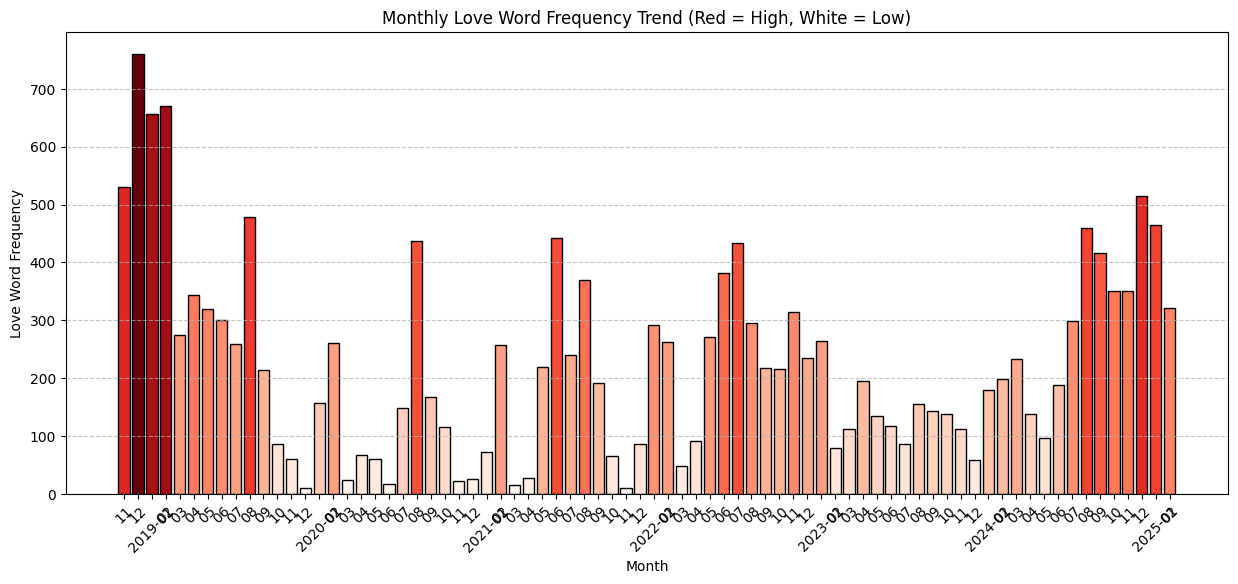

In [25]:
# 3️⃣ Word Frequency Analysis
print("\n🔹 **Word Frequency Analysis (Top 10 Words)**")
word_freq_df = pd.DataFrame(sorted(word_count.items(), key=lambda x: x[1], reverse=True), columns=["Word", "Frequency"])
print(word_freq_df.head(10))  # Print top 10 most frequent words

# 4️⃣ Analyze Monthly Trend for Affectionate Words
love_words_df = pd.DataFrame(list(monthly_love_words.items()), columns=["Month", "Love Word Count"])
love_words_df = love_words_df.sort_values("Month")  # Sort by month

# ✅ Adjust X-axis format
def format_month_labels(dates):
    formatted_labels = []
    for i, date in enumerate(dates):
        year, month = date.split("-")
        if month == "01":
            formatted_labels.append(f"{year}-{month}")  # Show full "YYYY-01" for January
        else:
            formatted_labels.append(month)  # Show only the month for other months
    return formatted_labels

# ✅ Expand chart width for better readability
print("\n🔹 **Generating Love Word Frequency Chart**")
fig, ax = plt.subplots(figsize=(15, 6))
color_values = np.array(love_words_df["Love Word Count"])  # Get frequency values
normalized_values = (color_values - min(color_values)) / (max(color_values) - min(color_values) + 1e-5)  # Normalize to 0-1
colors = plt.cm.Reds(normalized_values)  # Assign colors (red = high, white = low)

bars = ax.bar(love_words_df["Month"], love_words_df["Love Word Count"], color=colors, edgecolor="black")

# Format X-axis labels
ax.set_xticklabels(format_month_labels(love_words_df["Month"]), rotation=45)

plt.xlabel("Month")
plt.ylabel("Love Word Frequency")
plt.title("Monthly Love Word Frequency Trend (Red = High, White = Low)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**🔹 Key Insights and Observations**

**1️⃣ Seasonal Trends: Distance Increases Communication 💬**

Every year, January, February, July, and August consistently show an increase in love word frequency.

This aligns with periods of long-distance communication, as these months typically involve travel, holidays, or temporary separation.

The increase suggests that being apart leads to more affectionate conversations, possibly as a way to maintain emotional closeness.

**2️⃣ 2024 – Significant Increase in Chat Frequency 🔥**

A major spike starts in August 2024, coinciding with the time of studying abroad.

The sustained high frequency indicates more frequent and emotionally expressive conversations, likely due to physical distance necessitating stronger virtual connection.

The trend remains high, suggesting a continuous need for reassurance and affection during the transition to studying abroad.

**3️⃣ Yearly Communication Peaks & Lows 📊**

**✅ Most Active Month & Year (Highest Chat Frequency):**

Month: 📌 December 2019 shows the highest frequency, with over 700 occurrences of affectionate words.

Year: 📌 2019 overall had the highest love word frequency, likely due to the early stages of the relationship or a special event/holiday season.

**📉 Least Active Month & Year (Lowest Chat Frequency):**

Month: 📌 Mid-2020 (June - July) recorded the lowest frequency, suggesting a period of less communication or emotional distance.

Year: 📌 2020 had the fewest affectionate messages, possibly due to changes in routine, external factors, or reduced interaction during that time.

**🔹 Possible Explanations for Trends**

**✅ Long-Distance Periods Drive More Conversations**

Peaks in January, February, July, and August suggest that separation leads to more frequent and affectionate chats.
This pattern appears consistently each year, reinforcing the idea that physical distance strengthens digital communication.

**✅ Early Relationship Phase Had Higher Engagement**

2019 showed the highest affectionate word count, likely due to the excitement of a new relationship or important shared moments.

**✅ Chat Frequency Increased After Studying Abroad**

Starting from August 2024, a sharp rise in affectionate words indicates that distance increased emotional expression.

The trend remained high, suggesting a continued effort to stay connected despite time zone differences and lifestyle changes.

**📌 Suggested Next Steps**

🔍 Compare with Key Events: Overlay this data with anniversaries, vacations, or major life changes to better understand communication shifts.

📊 Analyze Sentiment Patterns: Check if certain words were more common during high-frequency vs. low-frequency months to see how conversation topics evolved.

📅 Monitor Future Trends: If the communication is ongoing, continue tracking how affectionate word frequency changes after settling into studying abroad.

🚀 This analysis highlights how long-distance relationships impact communication habits, showing both challenges and strengthened connections over time! 💖